In [1]:
import numpy as np; np.random.seed(31)
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
dataset_path = os.path.join(os.getcwd(), 'dataset', 'pickles')

# Load the data

filenames = os.listdir(dataset_path)
data = {}
for filename in filenames :
    data[filename.split('.')[0]] = pd.read_pickle(os.path.join(dataset_path, filename))

In [3]:
font_names = list(data.keys())
print(len(font_names), *np.random.choice(font_names, 5), sep='\n')


1696
GeostarFill-Regular
DaiBannaSIL-BoldItalic
BonheurRoyale-Regular
CinzelDecorative-Regular
Kanit-ExtraBold


BraahOne-Regular


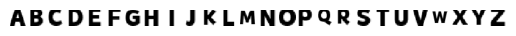

(26, 28, 28)


In [4]:

font = np.random.choice(font_names)
print(font)

# Plot the data

def plot_data(font) :

    # Get the data
    df = data[font]
    images = df['images']

    # for each image in the images, plot it
    for i in range(len(images)) :
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.show()
    images = np.array(images)
    print(images.shape)


plot_data(font)


In [34]:
for key in font_names :
  if key not in data :
    continue
  for char in data[key]['images'] :
    if char.shape != (28, 28) :
      print(key)
      data.pop(key)
      break

In [35]:
images = np.array([data[key]['images'] for key in data.keys()])

In [37]:
images.shape

In [39]:
def save_csv(images):
    images_copy = images.copy() 
    num_fonts, num_chars, h,w = images_copy.shape
    assert h == w

    images_copy = images_copy.reshape(num_fonts, num_chars * h * w)

    # save as a csv file in dataset/

    csv_path = os.path.join(os.getcwd(), 'dataset', 'csv')

    if not os.path.exists(csv_path) :
        os.mkdir(csv_path)

    csv_filename = os.path.join(csv_path, 'images.csv')
    np.savetxt(csv_filename, images_copy, delimiter=',')

In [40]:
save_csv(images)

ValueError: not enough values to unpack (expected 4, got 2)